In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./datasets/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [4]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [5]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [6]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [8]:
X_train_trf.shape

(8000, 11)

In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(3, activation = "sigmoid", input_dim = 11))
model.add(Dense(1, activation = "sigmoid"))

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss = "binary_crossentropy", optimizer = "Adam")

In [13]:
model.fit(X_train_trf, y_train, epochs = 10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5419
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4734
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4456
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4416
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4270
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4363
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4368
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4348
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4240
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4334


In [14]:
model.layers[0].get_weights()

[array([[ 0.11662798,  0.1125726 ,  0.12962362],
        [ 1.5339897 , -1.5936073 , -0.64939463],
        [-0.26903883,  0.05329226, -0.03135685],
        [ 0.29651886, -0.57875156,  0.23410383],
        [-0.26383892,  0.05090668,  0.08362741],
        [ 0.16893935,  0.20230438, -0.06835469],
        [-0.156897  ,  0.43126893,  0.965909  ],
        [ 0.13386093,  0.18323544, -0.21203576],
        [ 0.1466844 , -0.18951711, -0.9679331 ],
        [-0.43395254, -0.2519818 , -0.07302218],
        [-0.1667231 ,  0.68075866,  0.13622773]], dtype=float32),
 array([-0.24623252,  0.2544475 ,  0.49315053], dtype=float32)]

In [15]:
model.layers[1].get_weights()

[array([[ 0.85683507],
        [-1.6216904 ],
        [-1.3679124 ]], dtype=float32),
 array([-0.3003844], dtype=float32)]

In [17]:
y_log = model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [19]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.816

In [21]:
# let's tweak and play around!

model2 = Sequential()

model2.add(Dense(11, activation = 'relu', input_dim = 11))
model2.add(Dense(11, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

model2.summary()

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model2.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics = ['accuracy'])

In [36]:
history = model2.fit(X_train_trf, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8579 - loss: 0.3357 - val_accuracy: 0.8525 - val_loss: 0.3496
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8722 - loss: 0.3136 - val_accuracy: 0.8531 - val_loss: 0.3514
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8670 - loss: 0.3222 - val_accuracy: 0.8525 - val_loss: 0.3494
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8700 - loss: 0.3220 - val_accuracy: 0.8544 - val_loss: 0.3487
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8652 - loss: 0.3245 - val_accuracy: 0.8537 - val_loss: 0.3489
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8653 - loss: 0.3327 - val_accuracy: 0.8556 - val_loss: 0.3517
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8735 - loss: 0.3040 - val_accuracy: 0.8544 - val_loss: 0.3497
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8717 - loss: 0.3178 - val_accu

In [37]:
y_log2 = model2.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [38]:
y_pred2 = np.where(y_log2 > 0.5, 1, 0)

In [39]:
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy2

0.8615

In [40]:
# let's make some plots!

In [42]:
history.history

{'accuracy': [0.8676562309265137,
  0.8684375286102295,
  0.8684375286102295,
  0.8687499761581421,
  0.8682812452316284,
  0.8685937523841858,
  0.8687499761581421,
  0.8685937523841858,
  0.8698437213897705,
  0.8682812452316284,
  0.8682812452316284,
  0.8696874976158142,
  0.8675000071525574,
  0.8700000047683716,
  0.8675000071525574,
  0.8695312738418579,
  0.8698437213897705,
  0.8696874976158142,
  0.8678125143051147,
  0.8701562285423279,
  0.8698437213897705,
  0.8678125143051147,
  0.8678125143051147,
  0.8668749928474426,
  0.8682812452316284,
  0.8698437213897705,
  0.8698437213897705,
  0.8698437213897705,
  0.8682812452316284,
  0.8690624833106995,
  0.8690624833106995,
  0.8698437213897705,
  0.8668749928474426,
  0.8695312738418579,
  0.8696874976158142,
  0.8689062595367432,
  0.8695312738418579,
  0.8684375286102295,
  0.8704687356948853,
  0.8682812452316284,
  0.8707812428474426,
  0.8698437213897705,
  0.8701562285423279,
  0.8682812452316284,
  0.8695312738418579

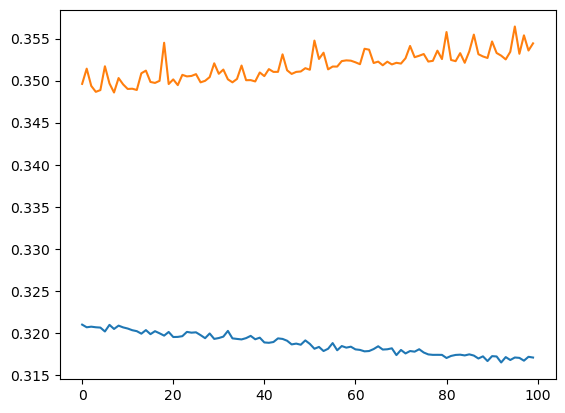

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

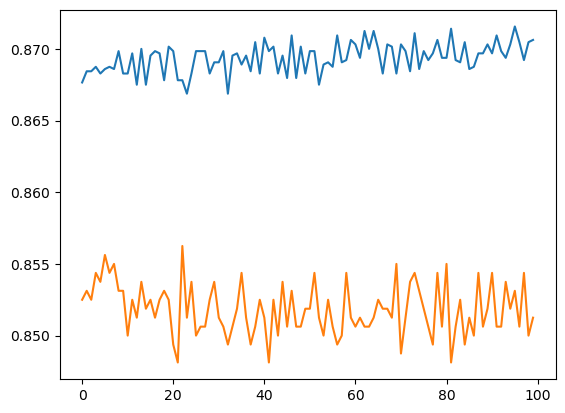

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])